In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(test_labels)

10000

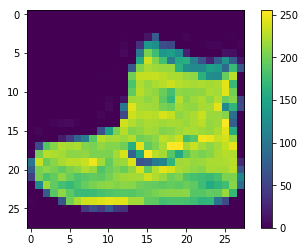

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

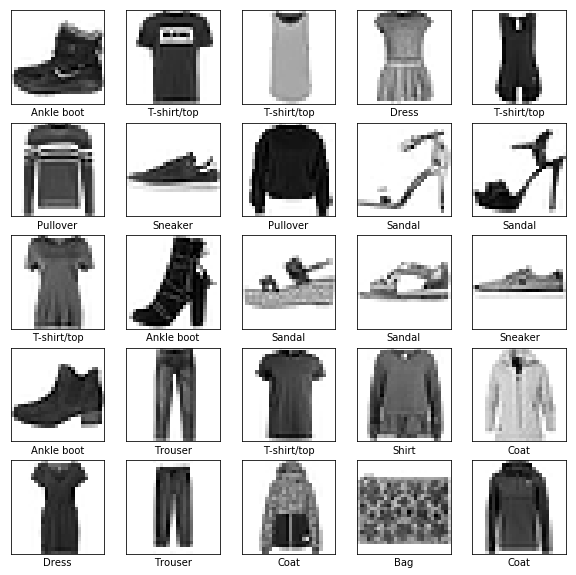

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.4993 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.3783 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.3365 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.3125 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.2948 - acc: 0.8920


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 58us/step
Test accuracy: 0.8761


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([4.8030411e-06, 2.4894664e-08, 1.0251775e-07, 7.2021056e-09,
       1.0113354e-06, 9.3823057e-03, 8.9883788e-06, 9.9041108e-03,
       1.6668283e-06, 9.8069692e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

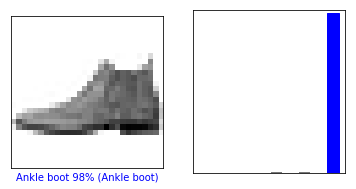

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

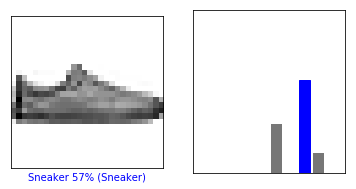

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

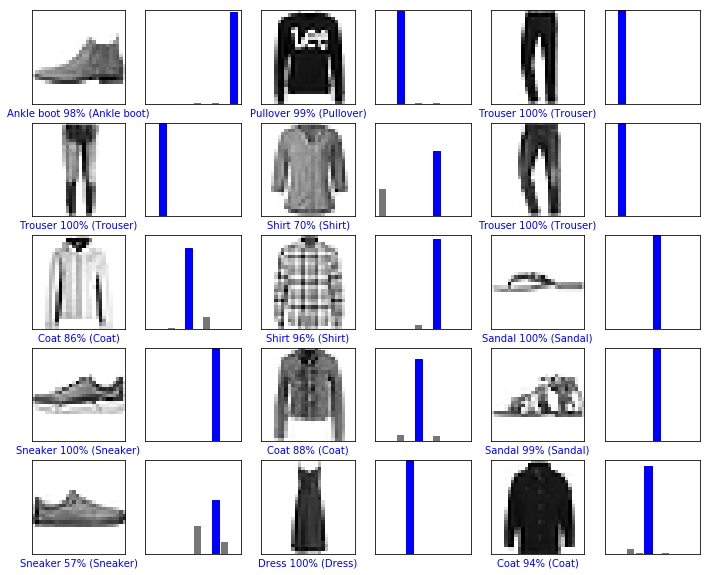

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.8030365e-06 2.4894664e-08 1.0251775e-07 7.2021056e-09 1.0113345e-06
  9.3822973e-03 8.9883788e-06 9.9041061e-03 1.6668283e-06 9.8069692e-01]]


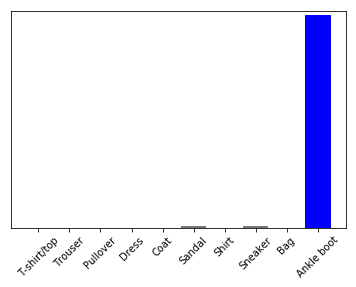

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

9

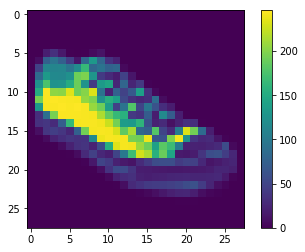

In [60]:
from skimage.io import imread
img=imread('/home/mike/Documents/img1.png')
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [63]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


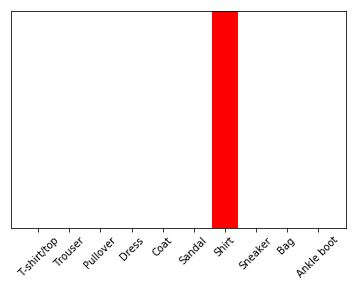

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

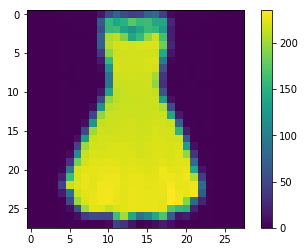

In [51]:
from skimage.io import imread
img=imread('/home/mike/Documents/img2.png')
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [52]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [53]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


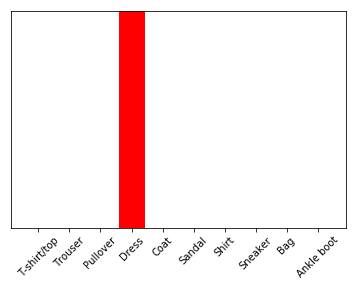

In [54]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

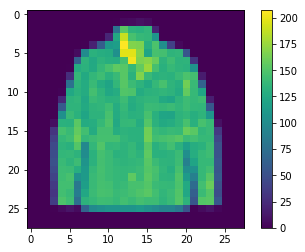

In [56]:
from skimage.io import imread
img=imread('/home/mike/Documents/img3.png')
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [57]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [58]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


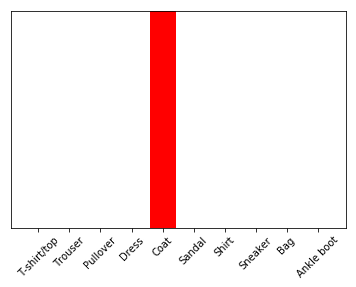

In [59]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

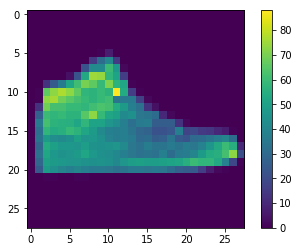

In [64]:
from skimage.io import imread
img=imread('/home/mike/Documents/img4.png')
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [65]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [66]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


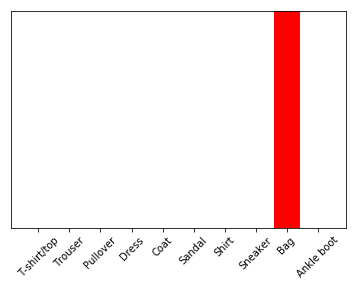

In [67]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

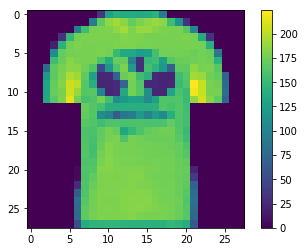

In [68]:
from skimage.io import imread
img=imread('/home/mike/Documents/img5.png')
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [69]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [70]:
predictions_single = model.predict(img)

print(predictions_single)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


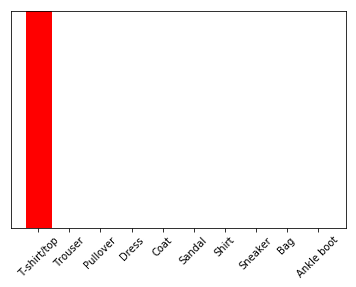

In [71]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

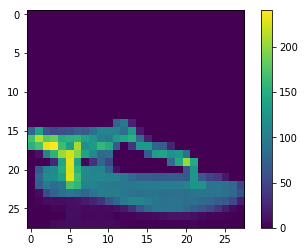

In [80]:
from skimage.io import imread
img=imread('/home/mike/Documents/img6.png')
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [81]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [83]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


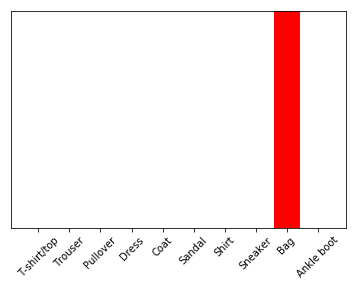

In [84]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)